In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("UpdatedResumeDataSet.csv")
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [3]:
df.shape

(962, 2)

# Exploring Categories

In [6]:
df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

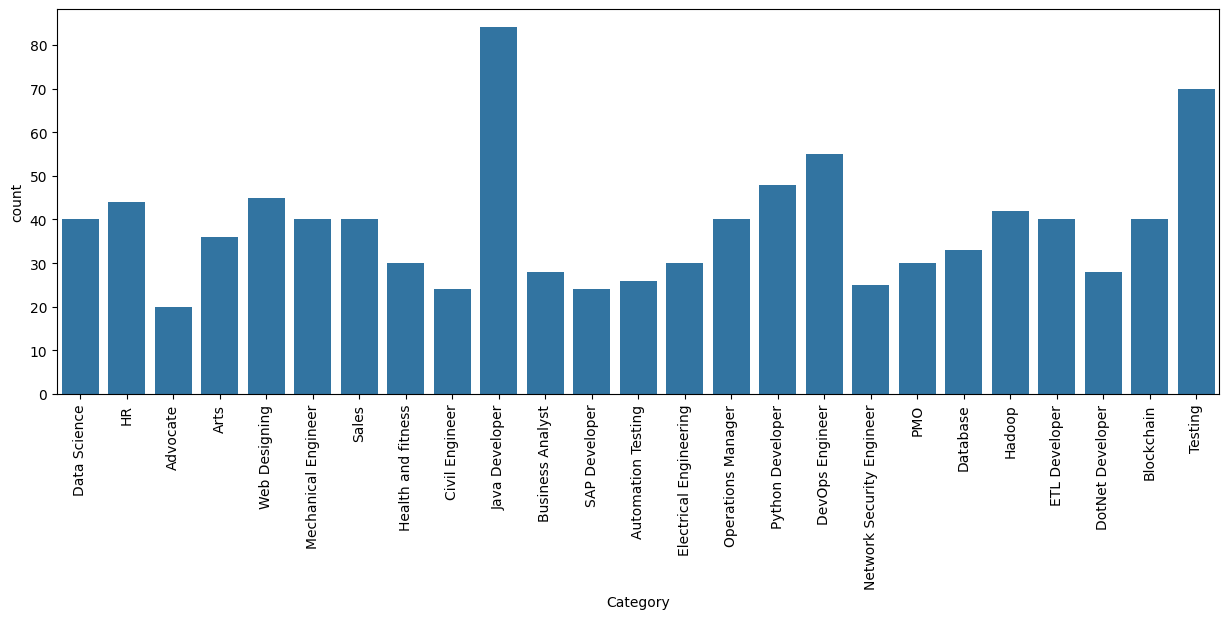

In [15]:
plt.figure(figsize=(15,5))
sns.countplot(x=df["Category"])
plt.xticks(rotation=90)
plt.show()

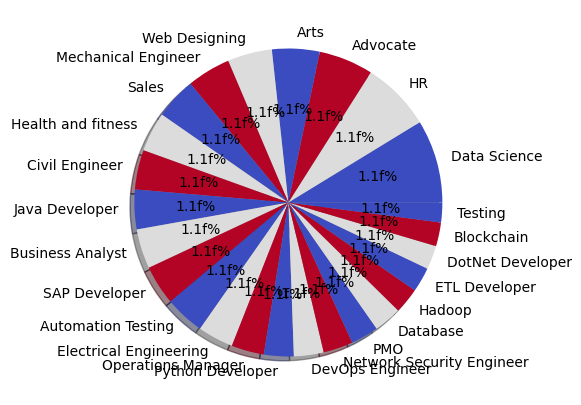

In [27]:
plt.figure(figsize=(30,5))
counts=df['Category'].value_counts()
labels=df['Category'].unique()
plt.pie(counts,labels=labels,autopct="1.1f%%",shadow=True,colors=plt.cm.coolwarm(np.linspace(0,1,3)))
plt.show()

#Exploring Resume

In [30]:
df['Category']

0      Data Science
1      Data Science
2      Data Science
3      Data Science
4      Data Science
           ...     
957         Testing
958         Testing
959         Testing
960         Testing
961         Testing
Name: Category, Length: 962, dtype: object

In [32]:
df['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

# If we look at the data it is in the format of /n \,/,/ etc
# so we need to clean them all

In [3]:
import re

def clean_text(text):
    # Lowercase the text
    text = text.lower()
    
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)

    # Remove URLs
    text = re.sub(r'http\S+|www\S+', '', text)

    # Remove special characters, punctuations, and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()

    return text



In [4]:
#Example of cleaning the text data as
clean_text("hello world i like to eat http://helloworld and access it")

'hello world i like to eat and access it'

In [5]:
df['Resume']=df['Resume'].apply(lambda x:clean_text(x))

In [6]:
df['Resume'][0]

'skills programming languages python pandas numpy scipy scikitlearn matplotlib sql java javascriptjquery machine learning regression svm nave bayes knn random forest decision trees boosting techniques cluster analysis word embedding sentiment analysis natural language processing dimensionality reduction topic modelling lda nmf pca neural nets database visualizations mysql sqlserver cassandra hbase elasticsearch djs dcjs plotly kibana matplotlib ggplot tableau others regular expression html css angular logstash kafka python flask git docker computer vision open cv and understanding of deep learningeducation details data science assurance associate data science assurance associate ernst young llp skill details javascript exprience months jquery exprience months python exprience monthscompany details company ernst young llp description fraud investigations and dispute services assurance technology assisted review tar technology assisted review assists in accelerating the review process an

# Words into Categorical Values

In [55]:
df['Category']

0       6
1       6
2       6
3       6
4       6
       ..
957    23
958    23
959    23
960    23
961    23
Name: Category, Length: 962, dtype: int32

In [19]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Category']=le.fit_transform(df['Category'])

In [20]:
df['Category'].value_counts()

Category
15    84
23    70
8     55
20    48
24    45
12    44
13    42
3     40
10    40
18    40
6     40
22    40
16    40
1     36
7     33
11    30
14    30
19    30
4     28
9     28
2     26
17    25
21    24
5     24
0     20
Name: count, dtype: int64

In [21]:
df.columns

Index(['Category', 'Resume'], dtype='object')

# Vactorization

In [60]:
df['Resume'][0],df['Category'][0]


('skills programming languages python pandas numpy scipy scikitlearn matplotlib sql java javascriptjquery machine learning regression svm nave bayes knn random forest decision trees boosting techniques cluster analysis word embedding sentiment analysis natural language processing dimensionality reduction topic modelling lda nmf pca neural nets database visualizations mysql sqlserver cassandra hbase elasticsearch djs dcjs plotly kibana matplotlib ggplot tableau others regular expression html css angular logstash kafka python flask git docker computer vision open cv and understanding of deep learningeducation details data science assurance associate data science assurance associate ernst young llp skill details javascript exprience months jquery exprience months python exprience monthscompany details company ernst young llp description fraud investigations and dispute services assurance technology assisted review tar technology assisted review assists in accelerating the review process a

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer(stop_words='english')

In [24]:
vectorizer.fit(df['Resume'])

TfidfVectorizer(stop_words='english')

In [25]:
requestText=vectorizer.transform(df['Resume'])

In [26]:
df

,Category,Resume
0,6,skills programming languages python pandas num...
1,6,education details may to may be uitrgpv data s...
2,6,areas of interest deep learning control system...
3,6,skills r python sap hana tableau sap hana sql ...
4,6,education details mca ymcaust faridabad haryan...
...,...,...
957,23,computer skills proficient in ms office word b...
958,23,willingness to accept the challenges positive ...
959,23,personal skills quick learner eagerness to lea...
960,23,computer skills software knowledge mspower poi...


In [27]:
requestText.tocsr()

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 158383 stored elements and shape (962, 7460)>

# spiltting 

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(requestText,df['Category'],test_size=0.2,random_state=42)

In [66]:
x_test

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 33892 stored elements and shape (193, 7460)>

In [29]:
x_train.shape

(769, 7460)

In [30]:
x_test.shape

(193, 7460)

In [31]:
y_train.shape,y_test.shape

((769,), (193,))

# Now Train the model


In [37]:
from sklearn.neighbors import KNeighborsClassifier
clf=OneVsRestClassifier(KNeighborsClassifier())

clf.fit(x_train,y_train)

OneVsRestClassifier(estimator=KNeighborsClassifier())

In [38]:
y_pred=clf.predict(x_test)

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [39]:
y_pred

array([15, 15, 15, 13, 14, 17, 16,  2,  0, 14, 13, 12, 16, 23, 20,  5,  6,
        4, 10,  9, 19,  1, 10, 23, 23, 21, 22, 22,  2, 12, 18,  1,  8, 24,
       11, 23,  7, 12, 24,  8, 18,  6,  8, 19, 24, 23, 21,  1, 15,  4, 15,
       22, 11,  5, 15, 13,  1, 19,  5, 12, 22, 22, 20, 24, 21, 18, 12, 10,
       10, 20, 10,  8,  9, 21, 17, 21,  0, 17, 16, 14, 15, 11, 11,  8, 20,
        3, 19,  8,  0,  2,  9, 10,  2, 23, 20, 20, 23, 12, 18, 12,  7, 16,
        8, 14, 18,  3, 14, 19, 14, 14, 15, 18,  8,  2, 21, 18, 23, 10, 23,
        5, 11, 15, 12,  3,  5,  3,  7, 12, 19,  8, 20, 19,  3, 15,  9, 19,
        1, 23, 21,  5, 20, 15, 16,  7,  7,  8, 15, 18,  1, 15, 13, 20,  7,
        4, 18, 11,  5, 15,  5, 12,  9, 22, 18, 21,  8, 23,  4, 12, 24, 16,
       15, 22,  8, 22,  3, 16, 23, 23, 12,  7, 16, 18,  5,  3, 18,  8, 23,
       23, 20, 21,  6,  7, 23])

In [52]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))


0.9844559585492227


In [35]:
from sklearn.multiclass import OneVsRestClassifier

In [40]:
import pickle

In [42]:
pickle.dump(vectorizer,open('tfidf.pkl','wb'))
pickle.dump(clf,open('clf.pkl','wb'))

In [61]:
myresume="""
skills programming languages python pandas numpy scipy scikitlearn matplotlib sql java javascriptjquery machine learning regression svm nave bayes knn random forest decision trees boosting techniques cluster analysis word embedding sentiment analysis natural language processing dimensionality reduction topic modelling lda nmf pca neural nets database visualizations mysql sqlserver cassandra hbase elasticsearch djs dcjs plotly kibana matplotlib ggplot tableau others regular expression html css angular logstash kafka python flask git docker computer vision open cv and understanding of deep learningeducation details data science assurance associate data science assurance associate ernst young llp skill details javascript exprience months jquery exprience months python exprience monthscompany details company ernst young llp description fraud investigations and dispute services assurance technology assisted review tar technology assisted review assists in accelerating the review process and run analytics and generate reports core member of a team helped in developing automated review platform tool from scratch for assisting e discovery domain this tool implements predictive coding and topic modelling by automating reviews resulting in reduced labor costs and time spent during the lawyers review understand the end to end flow of the solution doing research and development for classification models predictive analysis and mining of the information present in text data worked on analyzing the outputs and precision monitoring for the entire tool tar assists in predictive coding topic modelling from the evidence by following ey standards developed the classifier models in order to identify red flags and fraudrelated issues tools technologies python scikitlearn tfidf wordvec docvec cosine similarity nave bayes lda nmf for topic modelling vader and text blob for sentiment analysis matplot lib tableau dashboard for reporting multiple data science and analytic projects usa clients text analytics motor vehicle customer review data received customer feedback survey data for past one year performed sentiment positive negative neutral and time series analysis on customer comments across all categories created heat map of terms by survey category based on frequency of words extracted positive and negative words across all the survey categories and plotted word cloud created customized tableau dashboards for effective reporting and visualizations chatbot developed a user friendly chatbot for one of our products which handle simple questions about hours of operation reservation options and so on this chat bot serves entire product related questions giving overview of tool via qa platform and also give recommendation responses so that user question to build chain of relevant answer this too has intelligence to build the pipeline of questions as per user requirement and asks the relevant recommended questions tools technologies python natural language processing nltk spacy topic modelling sentiment analysis word embedding scikitlearn javascriptjquery sqlserver information governance organizations to make informed decisions about all of the information they store the integrated information governance portfolio synthesizes intelligence across unstructured data sources and facilitates action to ensure organizations are best positioned to counter information risk scan data from multiple sources of formats and parse different file formats extract meta data information push results for indexing elastic search and created customized interactive dashboards using kibana preforming rot analysis on the data which give information of data which helps identify content that is either redundant outdated or trivial preforming fulltext search analysis on elastic search with predefined methods which can tag as pii personally identifiable information social security numbers addresses names etc which frequently targeted during cyberattacks tools technologies python flask elastic search kibana fraud analytic platform fraud analytics and investigative platform to review all red flag cases fap is a fraud analytics and investigative platform with inbuilt case manager and suite of analytics for various erp systems it can be used by clients to interrogate their accounting systems for identifying the anomalies which can be indicators of fraud by running advanced analytics tools technologies html javascript sqlserver jquery css bootstrap nodejs djs dcjs
"""

In [62]:
import pickle
clf=pickle.load(open('clf.pkl','rb'))
# Clean the text
cleaned_resume=clean_text(myresume)

#transform the cleaned resume using the trained vectorizer
input_features=vectorizer.transform(['cleaned_resume'])

#Predicton using the loaded classifier
predition_id=clf.predict(input_features)

print(predition_id)



[16]
